In [66]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
import tensorflow as tf
from keypoint_model import KeypointDetectorModel
from mask_utils import points_from_mask ,get_perspective_transform


In [67]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
image = cv2.imread('field.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

template = cv2.imread('template.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)

In [2]:
!wget "https://storage.googleapis.com/narya-bucket-1/models/keypoint_detector.h5"

--2023-09-24 23:16:21--  https://storage.googleapis.com/narya-bucket-1/models/keypoint_detector.h5
Resolviendo storage.googleapis.com (storage.googleapis.com)... 142.250.184.27, 142.250.185.27, 142.250.200.123, ...
Conectando con storage.googleapis.com (storage.googleapis.com)[142.250.184.27]:443... conectado.
Petición HTTP enviada, esperando respuesta... 403 Forbidden
2023-09-24 23:16:22 ERROR 403: Forbidden.



In [69]:

kp_model = KeypointDetectorModel(
    backbone='efficientnetb3', num_classes=29, input_shape=(320, 320),
)

WEIGHTS_PATH = (
    "https://storage.googleapis.com/narya-bucket-1/models/keypoint_detector.h5"
)
WEIGHTS_NAME = "keypoint_detector.h5"
WEIGHTS_TOTAR = False


In [70]:
checkpoints = tf.keras.utils.get_file(
                WEIGHTS_NAME, WEIGHTS_PATH, WEIGHTS_TOTAR,
            )

kp_model.load_weights(checkpoints)



Exception: URL fetch failure on https://storage.googleapis.com/narya-bucket-1/models/keypoint_detector.h5: 403 -- Forbidden

In [71]:
pr_mask = kp_model(image)

1/1 [==============================] - 1s 1s/step


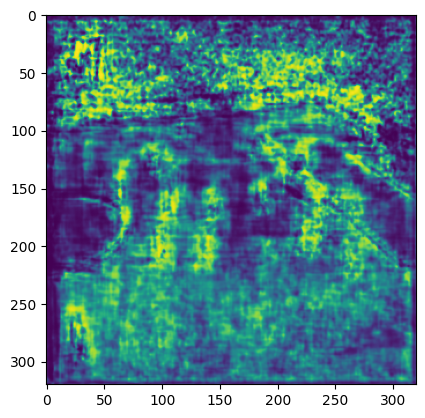

In [72]:
plt.imshow(pr_mask[..., -1].squeeze())

In [73]:
src,dst = points_from_mask(pr_mask[0])

In [74]:
pred_homo = get_perspective_transform(dst,src)

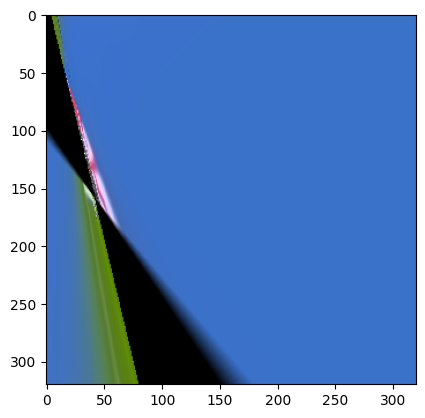

In [76]:
im_out = cv2.warpPerspective(image, pred_homo, (template.shape[1],template.shape[0]))
plt.imshow(im_out)